### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


import sklearn
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import classification_report

import time

import pickle 

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_formats = ['svg']

%matplotlib inline


# NOTE based off a notebook from a previous lab/assignment, so the code is a little messy

**Install MAPIE via `pip`**:

`!pip install mapie`

### Load Dataset

In [2]:
# Import Data
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
# Select input and output features
X = df.drop(columns = ['fetal_health'])
y = df['fetal_health']

In [4]:

# NOTE no categorical variables in this dataset
# One hot encoding for categorical variables
# X_encoded = pd.get_dummies(X)
# X_encoded.head()

In [5]:
# Data partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Implement Random Forest Classifier

In [6]:
# Define your model
clf = RandomForestClassifier(random_state = 42)

In [7]:
# Fit the model
start = time.time()            # Start Time
clf.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Training time: 0.2621028423309326s


#### Evaluate Prediction Performance on Test Set

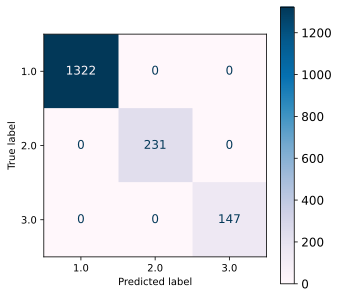

In [8]:
# Predict Test Set
y_pred_train = clf.predict(train_X)

# # Evaluate the model on test set
# r2 = sklearn.metrics.r2_score(test_y, y_pred)
# print('R-squared on Test Set: %0.2f' %r2)

# RMSE_test = sklearn.metrics.root_mean_squared_error(test_y, y_pred)
# print('RMSE on Test Set: %0.2f' %RMSE_test)

# Now generate confusion matrix
cm = confusion_matrix(train_y, y_pred_train, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuBu', ax = ax);

#### **Evaluation on Test Set**

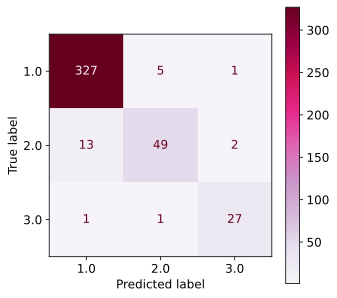

In [9]:
# Predictions on test set
y_pred = clf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax)

# Save as SVG
plt.savefig("confusion_mat_rf.svg", bbox_inches = 'tight');

#### **Classification Report**


In [10]:
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df

# Save the report as a CSV File
report_df.to_csv('class_report_rf.csv') 

#### Histogram of Residuals/Errors 

In [11]:
# # Calculate the residuals by subtracting the predicted values from the actual test values
# all_residuals = test_y - y_pred

# # Set up the figure with custom size and resolution (DPI)
# plt.figure(figsize=(6, 4), dpi = 150)

# # Plot the histogram of residuals
# plt.hist(all_residuals, bins = 25, color = 'lime', edgecolor = 'black')

# # Label X and Y axes
# plt.xlabel('Residuals', fontsize = 14)
# plt.ylabel('# of Test Datapoints', fontsize = 14)

# # Set the title of the plot
# plt.title('Distribution of Residuals', fontsize = 16)

# # Adjust the font size of x and y ticks
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10);

# # Savingresiduals
# plt.savefig("rf_residuals.svg", bbox_inches = 'tight')

#### Scatter Plot of Predicted Vs. Actual Values

In [12]:
# # Setting the figure size and resolution
# plt.figure(figsize = (6, 4), dpi = 150)

# # Scatter plot of actual vs predicted values
# plt.scatter(test_y, y_pred, color = 'blue', alpha = 0.6, edgecolor = 'black', s = 40)

# # 45-degree reference line (perfect predictions)
# plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color = 'red', linestyle = '--', lw = 2)

# # Axis labels and title
# plt.xlabel('Actual Values', fontsize = 10)
# plt.ylabel('Predicted Values', fontsize = 10)
# plt.title('Predicted vs Actual Values', fontsize = 12)

# # Adjust ticks
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10);

# plt.savefig("rf_predVactual.svg", bbox_inches = 'tight')

#### Feature Importance Plot

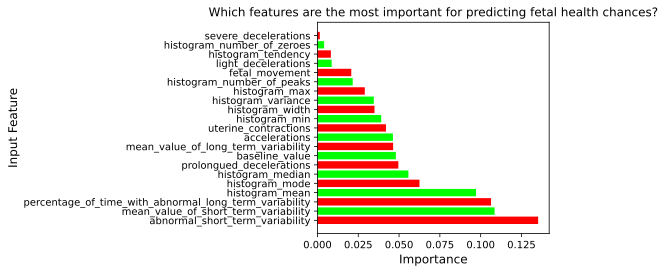

In [13]:
# Storing importance values from the trained model
importance = clf.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(8, 4))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['red', 'lime'])

plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Input Feature", fontsize = 12)
plt.title('Which features are the most important for predicting fetal health chances?', fontsize = 12) 
plt.yticks(fontsize = 10) # fontsize of yticks
plt.xticks(fontsize = 10) # fontsize of xticks

plt.tight_layout();
# save feature importance
plt.savefig("feature_imp_rf.svg", bbox_inches = 'tight')

In [14]:
# Pickle file: saving the trained  model
# Creating the file where we want to write the model
rf_pickle = open('random_forest_fh.pickle', 'wb') 

# Write DT model to the file
pickle.dump(clf, rf_pickle) 

# Close the file
rf_pickle.close()

### Prediction Intervals for Regression
<img src="Prediction_Interval.png" width="500" style="float: center"/>

#### **What is a Prediction Interval?**
- It is a **range of values** within which a new observation is expected to fall with a **certain probability**, given the existing data and model.

- **Probability**: The width of the prediction interval depends on the **desired confidence level**, (e.g., 95%), with higher confidence levels leading to wider intervals.

#### **Confidence Level of Prediction Interval**

- The confidence level of a prediction interval indicates the probability that the interval will contain the true value of the parameter being estimated.

- Mathematically, the confidence level of a prediction interval is denoted by $ (1 - \alpha) \times 100\% $, where $ \alpha $ is the significance level.

#### **Why Prediction Intervals are Useful?**

- **Uncertainty Quantification**: They provide a measure of the uncertainty in individual predictions, which is crucial for risk assessment and decision-making.

- **Communication**: They are an effective tool for communicating the uncertainty in predictions to stakeholders, making the model's predictions more interpretable.

In [15]:
# import os
# os.cpu_count()

#### **Prediction Intervals using MAPIE Regressor**

***MAPIE: Model Agnostic Prediction Interval Estimator***

- It is a Python library designed to estimate prediction intervals in a **model-agnostic way**.
- It can be used with **any machine learning model**, including linear models, decision trees, ensemble methods, and neural networks.

In [16]:
# # Define MAPIE regressor
# mapie = MapieRegressor(estimator = reg, # Prediction model to use
#                        n_jobs = -1,
#                        random_state = 42)

# # Fit mapie regressor on training data
# start = time.time()  
# mapie.fit(train_X, train_y)
# stop = time.time()             
# print(f"Training time: {stop - start}s")

# alpha = 0.1 # For 90% confidence level

# # Use mapie.predict() to get predicted values and intervals
# y_test_pred, y_test_pis = mapie.predict(test_X, alpha = alpha)

In [17]:
# # Predicted values
# y_test_pred

In [18]:
# Prediction Intervals
# y_test_pis

In [19]:
# # Storing results in a dataframe
# predictions = test_y.to_frame()
# predictions.columns = ['Actual Value']
# predictions["Predicted Value"] = y_test_pred.round(2)
# predictions["Lower Value"] = y_test_pis[:, 0].round(2)
# predictions["Upper Value"] = y_test_pis[:, 1].round(2)

# # Take a quick look
# predictions.tail(5)

### **Coverage Calculation**
- **Coverage** refers to the proportion of true/actual values that fall within the prediction intervals generated by a model.

- It is a measure of how well the prediction intervals capture the actual values.

  $\text{Coverage} = \frac{\text{Number of actual values within prediction intervals}}{\text{Total number of actual values}}$

In [20]:
# coverage = regression_coverage_score(test_y,           # Actual values
#                                      y_test_pis[:, 0], # Lower bound of prediction intervals
#                                      y_test_pis[:, 1]) # Upper bound of prediction intervals

# coverage_percentage = coverage * 100
# print(f"Coverage: {coverage_percentage:.2f}%")

In [21]:
# # Sort the predictions by 'Actual Value' for better visualization and reset the index
# sorted_predictions = predictions.sort_values(by=['Actual Value']).reset_index(drop=True)

# # Create a figure and axis object with specified size and resolution
# fig, ax = plt.subplots(figsize=(8, 4))

# # Plot the actual values with green dots
# plt.plot(sorted_predictions["Actual Value"], 'go', markersize=3, label="Actual Value")

# # Fill the area between the lower and upper bounds of the prediction intervals with semi-transparent green color
# plt.fill_between(np.arange(len(sorted_predictions)),
#                  sorted_predictions["Lower Value"],
#                  sorted_predictions["Upper Value"],
#                  alpha=0.2, color="green", label="Prediction Interval")

# # Set font size for x and y ticks
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)

# # Set the limit for the x-axis to cover the range of samples
# plt.xlim([0, len(sorted_predictions)])

# # Label the x-axis and y-axis with appropriate font size
# plt.xlabel("Samples", fontsize=10)
# plt.ylabel("Target", fontsize=10)

# # Add a title to the plot, including the coverage percentage, with bold formatting
# plt.title(f"Prediction Intervals and Coverage: {coverage_percentage:.2f}%", fontsize=12, fontweight="bold")

# # Add a legend to the plot, placed in the upper left, with specified font size
# plt.legend(loc="upper left", fontsize=10);

### Save Model

In [22]:
# # Creating the file where we want to write the model
# reg_pickle = open('reg_fh.pickle', 'wb') 

# # Write RF model to the file
# pickle.dump(mapie, reg_pickle) 

# # Close the file
# reg_pickle.close()